# Objective

Unemployment benefits is being dealt as a controversial topic lately in Congress between Republicans and Democrats. I wanted to scrap the text from an article from The Washington Post and with using sentiment analysis, I wanted to know if it's positive or negative. Although one article is not good enough to make an analysis and I could go deeper and scrap more articles and tweets from politicians and recipients to create an analysis. This project is more focused on web scrapping and sentiment analysis for sake of self-learning. 

In [5]:
import nltk
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import textblob
from textblob import TextBlob

In [6]:
# url of the article
url = 'https://www.washingtonpost.com/business/2020/08/06/600-dollar-unemployment-benefit/'

# Make the request and check object type
r = requests.get(url)
print(type(r))

# Extract html from response object and print
html = r.text
#print(html)

# Get the data with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
print(type(soup))

<class 'requests.models.Response'>
<class 'bs4.BeautifulSoup'>


In [7]:
# Text from the article
text = soup.get_text()
print(text)

The controversial $600 unemployment aid debate, explained - The Washington Post
Search InputsearchSectionsmenuSectionsmenuWashington Post LogoDemocracy Dies in DarknessSign inprofileSign inprofileNext articlesCoronavirus outbreakNationalLive updates: Ohio Gov. Mike DeWine says he’s tested positive for coronavir...TravelWhy more families are teaming up and hitting the road in vacation podsSoccerMLS plans return starting next week, will allow fans in some marketsEconomic PolicyAcrimony and impasse: Pelosi alleges Republicans don’t give ‘a damn’ about ...EconomyThe controversial $600 unemployment aid debate, explainedAnswer Sheet • PerspectiveThe education technology students will need — and won’t — after covid-19TravelWhile everyone else is decluttering, I’m keeping the books that made me a t...The AmericasCoronavirus surprise: Remittances to Mexico rise during pandemicBusinessTrump is calling for another eviction moratorium. Landlords are pushing bac...On ParentingThese psychologist mom

# Extract Words from Text using NLP

In [8]:
# Extract words from the text with NLP
tokens = re.findall('\w+', text)
tokens[:8]

# Initiate a new list to make the words into lower
words = []

# converting the tokens into lowercase using for loop
for word in tokens:
    words.append(word.lower())

# print 
words[:15]

['the',
 'controversial',
 '600',
 'unemployment',
 'aid',
 'debate',
 'explained',
 'the',
 'washington',
 'post',
 'search',
 'inputsearchsectionsmenusectionsmenuwashington',
 'post',
 'logodemocracy',
 'dies']

In [12]:
# Removing stopwords
sw = nltk.corpus.stopwords.words('english')

# Initialize new list
words_ns = []

# using for loop, remove sw from words
for word in words:
    if word not in sw:
        words_ns.append(word)

words_ns[:15]

['controversial',
 '600',
 'unemployment',
 'aid',
 'debate',
 'explained',
 'washington',
 'post',
 'search',
 'inputsearchsectionsmenusectionsmenuwashington',
 'post',
 'logodemocracy',
 'dies',
 'darknesssign',
 'inprofilesign']

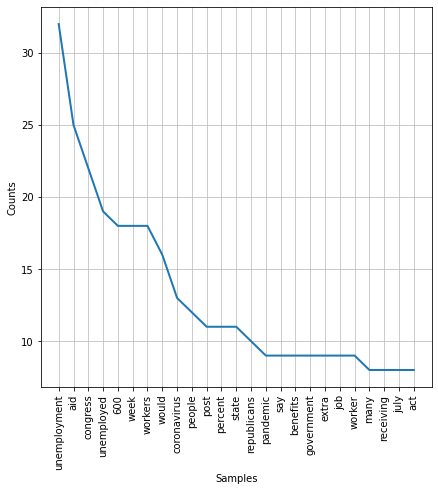

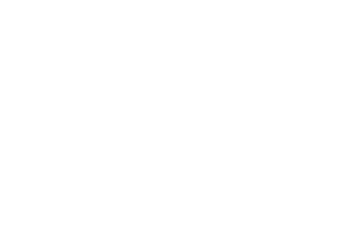

In [13]:
# Top words
plt.figure(figsize=(7,7))
nltk.FreqDist(words_ns).plot(25)
plt.axis('off')
plt.show()

In [21]:
# Creating a dataframe of tokens
word_t = pd.DataFrame()
word_t['word'] = words_ns

# Calculate subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Adding subjectivity and polarity in the dataframe
word_t['Subjectivity'] = word_t['word'].apply(getSubjectivity)
word_t['Polarity'] = word_t['word'].apply(getPolarity)

# Analysis - creating function if positive, negative or neutral
def ratio(x):
    if x > 0:
        return 1
    elif x== 0:
        return 0
    else:
        return -1
    
word_t['Analysis'] = word_t['Polarity'].apply(ratio)

# Print
word_t.sort_values('Analysis', ascending=False)

,word,Subjectivity,Polarity,Analysis
0,controversial,0.950000,0.550000,1
757,available,0.400000,0.400000,1
935,new,0.454545,0.136364,1
134,new,0.454545,0.136364,1
688,normal,0.650000,0.150000,1
...,...,...,...,...
1243,mean,0.687500,-0.312500,-1
462,long,0.400000,-0.050000,-1
567,mean,0.687500,-0.312500,-1
1041,long,0.400000,-0.050000,-1


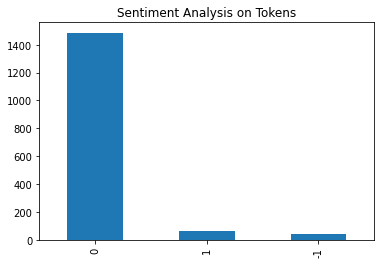

In [23]:
# Plotting the sentiments
plt.title('Sentiment Analysis on Tokens')
word_t['Analysis'].value_counts().plot(kind='bar')
plt.show()

According to the results, it seems that article is mostly neutral rather than mostly positive or negative. 

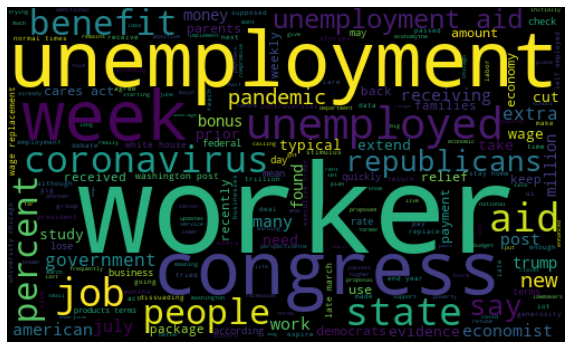

In [32]:

allwords = ' '.join([t for t in word_t['word']])
wordCloud = WordCloud(width= 500, height = 300, random_state=21, max_font_size=110).generate(allwords)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Summary 

This article is mostly neutral rather than positive or negative and most frequently used words are worker, congress, unemployment and coronavirus.